In [1]:
import numpy as np
import json
import tarfile
import matplotlib.pyplot as plt
import pandas as pd

After importing the necessary libraries and packages geting the yelp reviews dataset from a tarfile.

In [2]:
tar = tarfile.open('yelp_dataset.tar')
members = tar.getmembers()

review_file = tar.extractfile('yelp_academic_dataset_review.json')
review_data = []
for _ in range(50000):
    review_data.append(json.loads(review_file.readline()))


In [3]:
import datetime

In [4]:
tar.close()

In [5]:
review_file.close()

In [6]:
review_data[0]

{'review_id': 'lWC-xP3rd6obsecCYsGZRg',
 'user_id': 'ak0TdVmGKo4pwqdJSTLwWw',
 'business_id': 'buF9druCkbuXLX526sGELQ',
 'stars': 4.0,
 'useful': 3,
 'funny': 1,
 'cool': 1,
 'text': "Apparently Prides Osteria had a rough summer as evidenced by the almost empty dining room at 6:30 on a Friday night. However new blood in the kitchen seems to have revitalized the food from other customers recent visits. Waitstaff was warm but unobtrusive. By 8 pm or so when we left the bar was full and the dining room was much more lively than it had been. Perhaps Beverly residents prefer a later seating. \n\nAfter reading the mixed reviews of late I was a little tentative over our choice but luckily there was nothing to worry about in the food department. We started with the fried dough, burrata and prosciutto which were all lovely. Then although they don't offer half portions of pasta we each ordered the entree size and split them. We chose the tagliatelle bolognese and a four cheese filled pasta in a 

In [7]:
datetime.datetime.strptime(review_data[0]['date'], '%Y-%m-%d %H:%M:%S')

datetime.datetime(2014, 10, 11, 3, 34, 2)

In [8]:
datetime.datetime.fromisoformat(review_data[0]['date'])

datetime.datetime(2014, 10, 11, 3, 34, 2)

The date of the review is saved as a string. First converting it into a datetime object.

In [11]:
import time

for rev in review_data:
    rev['timeStruct'] = datetime.datetime.fromisoformat(rev['date'])
    # rev['timeInt'] = time.mktime(rev['timeStruct'])

review_data[0]

{'review_id': 'lWC-xP3rd6obsecCYsGZRg',
 'user_id': 'ak0TdVmGKo4pwqdJSTLwWw',
 'business_id': 'buF9druCkbuXLX526sGELQ',
 'stars': 4.0,
 'useful': 3,
 'funny': 1,
 'cool': 1,
 'text': "Apparently Prides Osteria had a rough summer as evidenced by the almost empty dining room at 6:30 on a Friday night. However new blood in the kitchen seems to have revitalized the food from other customers recent visits. Waitstaff was warm but unobtrusive. By 8 pm or so when we left the bar was full and the dining room was much more lively than it had been. Perhaps Beverly residents prefer a later seating. \n\nAfter reading the mixed reviews of late I was a little tentative over our choice but luckily there was nothing to worry about in the food department. We started with the fried dough, burrata and prosciutto which were all lovely. Then although they don't offer half portions of pasta we each ordered the entree size and split them. We chose the tagliatelle bolognese and a four cheese filled pasta in a 

In [15]:
datetime.datetime.fromisoformat(review_data[0]['date']).weekday()

5

List of ratings for each day of the week.

In [16]:
from collections import defaultdict

weekRatings = defaultdict(list)
for rev in review_data:
    day = rev['timeStruct'].weekday()
    weekRatings[day].append(rev['stars'])

In [17]:
# Averages for all the weeks

weekAvgs = {}

for day, ratings in weekRatings.items():
    weekAvgs[day] = sum(ratings)/len(ratings)
    
weekAvgs

{5: 3.7421045558392687,
 4: 3.820620807986274,
 1: 3.804724880382775,
 3: 3.8009612666101216,
 6: 3.7154450261780103,
 0: 3.726717151587618,
 2: 3.8222745532622247}

In [18]:
X = list(weekAvgs.keys()) # days of the week
y = [weekAvgs[x] for x in weekAvgs]
X, y

([5, 4, 1, 3, 6, 0, 2],
 [3.7421045558392687,
  3.820620807986274,
  3.804724880382775,
  3.8009612666101216,
  3.7154450261780103,
  3.726717151587618,
  3.8222745532622247])

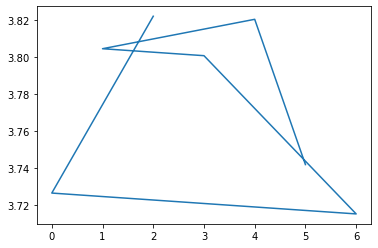

In [19]:
plt.plot(X, y)
plt.show()

In [20]:
# x must be sorted
weekAvgs = {key: val for key, val in sorted(weekAvgs.items(), key = lambda ele: ele[0])}
weekAvgs

{0: 3.726717151587618,
 1: 3.804724880382775,
 2: 3.8222745532622247,
 3: 3.8009612666101216,
 4: 3.820620807986274,
 5: 3.7421045558392687,
 6: 3.7154450261780103}

In [21]:
X = list(weekAvgs.keys()) # days of the week
y = [weekAvgs[x] for x in weekAvgs]
X, y

([0, 1, 2, 3, 4, 5, 6],
 [3.726717151587618,
  3.804724880382775,
  3.8222745532622247,
  3.8009612666101216,
  3.820620807986274,
  3.7421045558392687,
  3.7154450261780103])

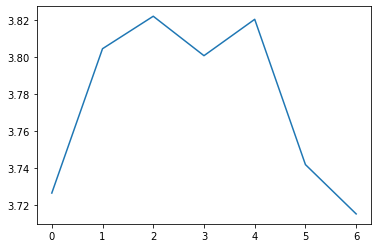

In [22]:
plt.plot(X, y)

<BarContainer object of 7 artists>

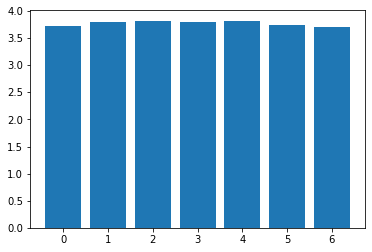

In [23]:
plt.bar(X, y)

<BarContainer object of 7 artists>

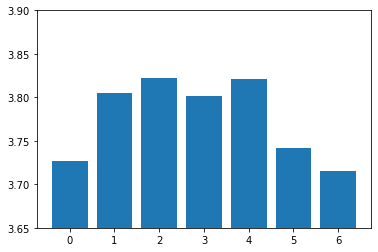

In [24]:
plt.ylim(3.65, 3.9)
plt.bar(X, y)

<BarContainer object of 7 artists>

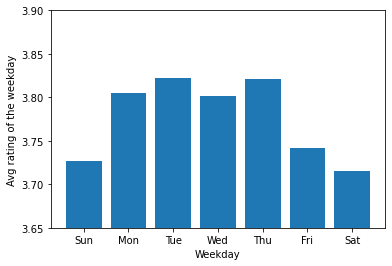

In [25]:
plt.ylim(3.65, 3.9)
plt.xlabel('Weekday')
plt.ylabel('Avg rating of the weekday')
plt.xticks(list(range(0, 7)), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.bar(X, y)